<a href="https://colab.research.google.com/github/qcsm/learndl/blob/master/Learning_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activate Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Gráfica de ejemplo
Usando NumPy y Matplotlib

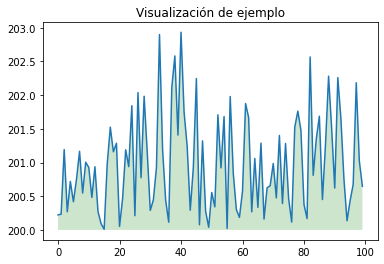

In [2]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + abs(np.random.randn(100))
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 200, where=(ys > 200), facecolor='g', alpha=0.2)

#ys = 200 + abs(np.random.randn(100))
#x = [x for x in range(len(ys))]
#
#plt.plot(x, ys, '-')
#plt.fill_between(x, ys, 200, where=(ys > 200), facecolor='b', alpha=0.2)

plt.title("Visualización de ejemplo")
plt.show()

# TensorFlow version?

In [3]:
%tensorflow_version

Currently selected TF version: 2.x
Available versions:
* 1.x
* 2.x


# Mount Google Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 # TensorFlow simple example



In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DATA/fake_reg.csv')

In [7]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [8]:
df.count()

price       1000
feature1    1000
feature2    1000
dtype: int64

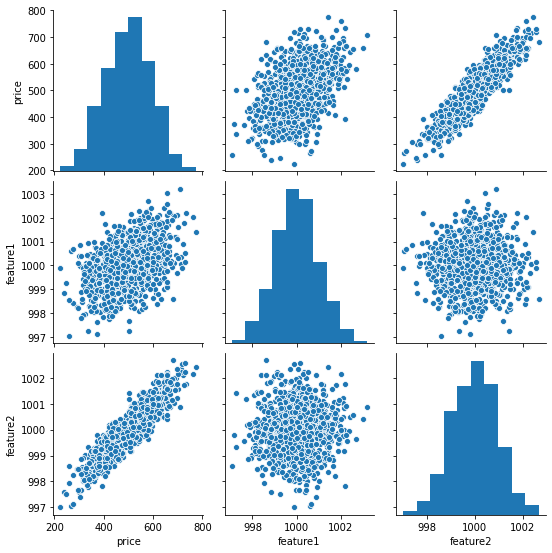

In [9]:
sns.pairplot(df)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df[['feature1','feature2']].values

In [12]:
y = df['price'].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

In [14]:
X_train

array([[1001.23108741,  998.63711842],
       [ 999.38690932,  999.84959104],
       [ 998.23257257, 1001.02270174],
       ...,
       [1000.47386523, 1001.44542815],
       [ 998.8625673 ,  999.15662112],
       [1000.55690247,  999.35441706]])

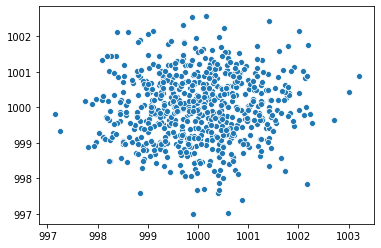

In [15]:
sns.scatterplot(X_train[:,0],X_train[:,1])

# Normalize or scale data
Lets scale the data. This things are done to avoid large values having high impact.

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


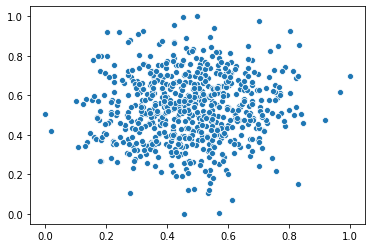

In [18]:
sns.scatterplot(X_train[:,0],X_train[:,1])

# All we need to build a very simple model with Keras
1. A base sequential model
1. Keep adding layers to it (in this case dense layers)


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [20]:
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  >>> # Optionally, the first layer can receive an `input_shape` argument:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  >>> # Afterwards, we do automatic shape inference:
 |  >>> model.add(tf.keras.layers.Dense(4))
 |  
 |  >>> # This is identical to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_dim=16))
 |  
 |  >>> # And to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, batch_input_shape=(None, 16)))
 |  
 |  >>> # Note that you can also omit the `input_shape` argument.
 |  >>> # In that case the model does

## Two ways to add layers
The second is prefered as you can easily comment out an in layers as required

In [21]:
model = Sequential([Dense(4, activation='relu'),
                    Dense(2, activation='relu'),
                    Dense(1)])

In [22]:
model = Sequential()
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

In [23]:
model.fit(x=X_train, y=y_train, epochs=250)

Epoch 1/250
21/21 [==============================] - 0s 1ms/step - loss: 256704.0312
Epoch 2/250
21/21 [==============================] - 0s 965us/step - loss: 256586.4531
Epoch 3/250
21/21 [==============================] - 0s 983us/step - loss: 256510.4062
Epoch 4/250
21/21 [==============================] - 0s 1ms/step - loss: 256433.2188
Epoch 5/250
21/21 [==============================] - 0s 1ms/step - loss: 256348.1094
Epoch 6/250
21/21 [==============================] - 0s 1ms/step - loss: 256248.8281
Epoch 7/250
21/21 [==============================] - 0s 1ms/step - loss: 256137.6250
Epoch 8/250
21/21 [==============================] - 0s 1ms/step - loss: 256013.1406
Epoch 9/250
21/21 [==============================] - 0s 1ms/step - loss: 255875.4219
Epoch 10/250
21/21 [==============================] - 0s 1ms/step - loss: 255722.5312
Epoch 11/250
21/21 [==============================] - 0s 1ms/step - loss: 255554.6250
Epoch 12/250
21/21 [==============================] - 0s 1m

In [24]:
# [print(x) for x in [round(x,1) for x in model.history.history['loss'][:4]]]
# print("...")
# [print(x) for x in [round(x,1) for x in model.history.history['loss'][-4:]]]

def headtail(list, n, decimals=2):
  result = []
  for x in list[:n]:
    result.append(round(x, decimals))
  for x in list[-n:]:
    result.append(round(x, decimals))
  return result

def headtail_print(l):
  for x in range(0,int(len(l)/2)):
    print(l[x])
  print("...")
  for x in range(int(len(l)/2), len(l)):
    print(l[x])


In [25]:
headtail_print( headtail(model.history.history['loss'], 5, 1) )

256704.0
256586.5
256510.4
256433.2
256348.1
...
34.0
32.8
31.8
31.0
29.6


In [26]:
loss_history_df = pd.DataFrame(model.history.history)

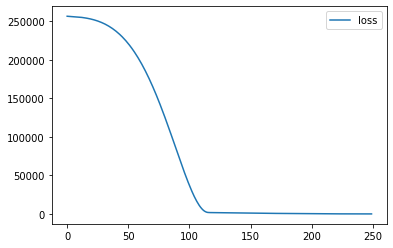

In [27]:
loss_history_df.plot()

# Evaluate the model
To see how it performs with data that has never seen before

In [28]:
model.evaluate(X_test, y_test, verbose=0)

33.28132247924805

In [29]:
model.evaluate(X_train, y_train, verbose=0)

32.638755798339844

In [30]:
test_predictions = model.predict(X_test)

In [31]:
headtail_print( headtail(test_predictions.ravel().tolist(), 5, 1) )

409.5
623.6
592.5
573.9
372.7
...
537.3
436.3
375.0
502.1
500.2


In [32]:
pd.Series( test_predictions.reshape(330,) )


0      409.531433
1      623.596375
2      592.530701
3      573.860657
4      372.735718
          ...    
325    537.259766
326    436.343842
327    374.992371
328    502.095428
329    500.232330
Length: 330, dtype: float32

In [33]:
predictions_df = pd.DataFrame(y_test, columns=['Test True Y'])

In [34]:
predictions_df

,Test True Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
325,535.543676
326,425.843651
327,368.920095
328,505.631884


In [35]:
test_preds = pd.Series( test_predictions.reshape(330,) )
compare_predictions_df = pd.concat([predictions_df, test_preds], axis = 1)
compare_predictions_df.columns = ['Test True Y', 'Model Predictions']
compare_predictions_df
# try to remove axis and see what happens

,Test True Y,Model Predictions
0,402.296319,409.531433
1,624.156198,623.596375
2,582.455066,592.530701
3,578.588606,573.860657
4,371.224104,372.735718
...,...,...
325,535.543676,537.259766
326,425.843651,436.343842
327,368.920095,374.992371
328,505.631884,502.095428


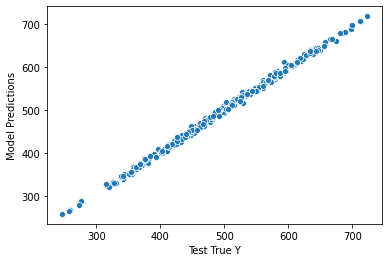

In [36]:
sns.scatterplot( x = 'Test True Y', y = 'Model Predictions', data = compare_predictions_df )

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error( 
    compare_predictions_df['Test True Y'], 
    compare_predictions_df['Model Predictions']
)

4.6637738884848385

## How to know if MAE is good or bad
When thinking on errors, you may feel tempted to thing that a small number is good enough! But actually small is relative. How big are the values that this error applies to?

To know this you can use the `describe()` function that comes with Pandas data frames. The values we are interested in are those below the `price` column, because the Price was our prediction target.

Below you can see that the mean price is around 500, and more interestingly the minimal price is around 220. Moreover, small values like the minimal are not very common. These are good news, it is not the same a $4 error per stack when counting hundreds than the same error when counting dozens.

Anyway, this kind of analysis, is quick, visual, but naïve and prone to be incorrect. It is not a good way to do the things right. So you can use it intuitively to get and share a quick sight without messing around, but never be confident with it.

In [38]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


## Better use MSE or RMSE



In [39]:
mean_squared_error( 
    compare_predictions_df['Test True Y'],
    compare_predictions_df['Model Predictions']
)

33.28132854888184

In [40]:
model.evaluate(X_test, y_test, verbose=0)

33.28132247924805

In [41]:
mean_squared_error( 
    compare_predictions_df['Test True Y'],
    compare_predictions_df['Model Predictions']
) ** 0.5

5.768997187456572

In [42]:
compare_predictions_df['Model Predictions'].describe()

count    330.000000
mean     502.634949
std       91.974274
min      257.696594
25%      439.554642
50%      505.091705
75%      568.393845
max      719.269409
Name: Model Predictions, dtype: float64

RMSE is similar to standard deviation in the error values frequency distribution, while MAE is a more intuitive measure of absolute error. RMSE is greater than MAE and penalizes large errors. MAE are similar while error is evenly distributed across all samples. RMSE is greater otherwise, being this difference max when all the error is accumulated in only one sample.

https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d

## Predict completely new values

In [43]:
new_gem = [[998,1000]]
new_gem = scaler.transform(new_gem)
model.predict(new_gem)

array([[424.70798]], dtype=float32)

# Save and load models

In [ ]:
from tensorflow.keras.models import load_model

model.save('my_model')

In [45]:
another_model = load_model('my_model')

In [46]:
another_model.predict(new_gem)

array([[424.70798]], dtype=float32)